In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.metrics import log_loss

In [44]:
'''
from google.colab import files
 
 
uploaded = files.upload()
'''

'\nfrom google.colab import files\n \n \nuploaded = files.upload()\n'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/Shareddrives/DATA 245 - ML/SF_crime_report.csv"
df = pd.read_csv(path)

In [5]:
df.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point
0,2019/03/05 09:00:00 PM,2019/03/05,21:00,2019,Tuesday,2019/03/07 12:54:00 PM,77808706372,778087,196048512,NaN,...,"Theft, Other Property, $50-$200",Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,30044000.0,Tenderloin,Tenderloin,6.0,37.779992,-122.413487,POINT (-122.41348740024354 37.77999173926721)
1,2018/12/22 12:00:00 PM,2018/12/22,12:00,2018,Saturday,2018/12/26 02:29:00 PM,75246907023,752469,180971777,183601903.0,...,"Vehicle, Stolen, Motorcycle",Open or Active,LINDEN ST \ BUCHANAN ST,25931000.0,Northern,Hayes Valley,5.0,37.775787,-122.427819,POINT (-122.42781910073226 37.77578657487239)
2,2018/08/24 05:30:00 PM,2018/08/24,17:30,2018,Friday,2018/08/24 07:35:00 PM,70675306243,706753,180639339,182363732.0,...,"Theft, From Locked Vehicle, $200-$950",Open or Active,PERU AVE \ BURROWS ST,21610000.0,Ingleside,Excelsior,9.0,37.723944,-122.422830,POINT (-122.42283006837721 37.72394419349765)
3,2018/10/20 03:10:00 PM,2018/10/20,15:10,2018,Saturday,2018/10/20 03:10:00 PM,72826462071,728264,180624631,182933454.0,...,Probation Search,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,23914000.0,Southern,South of Market,6.0,37.775161,-122.403636,POINT (-122.40363551943442 37.7751608100771)
4,2019/06/05 12:36:00 AM,2019/06/05,00:36,2019,Wednesday,2019/06/05 12:37:00 AM,80823030140,808230,190403077,191560061.0,...,"Air Gun, Possession",Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,30035000.0,Central,North Beach,3.0,37.802755,-122.413623,POINT (-122.4136227157606 37.80275505740129)


In [6]:
df.shape

(585140, 26)

In [7]:
# have a copy of df
df_copy = df.copy()

In [10]:
df['Incident Description'].unique()

array(['Theft, Other Property, $50-$200', 'Vehicle, Stolen, Motorcycle',
       'Theft, From Locked Vehicle, $200-$950', 'Probation Search',
       'Air Gun, Possession', 'Theft, From Building, >$950',
       'State Code Felony (general)', 'Burglary, Store, Unlawful Entry',
       'Violation of Restraining Order',
       'Robbery, Service Station, W/ Force', 'Lost Property',
       'False Personation to Receive Money or Property',
       'Malicious Mischief, Vandalism to Vehicle', 'Battery',
       'Vehicle, Recovered, Stolen outside SF', 'Case Closure',
       'Theft, From Locked Vehicle, >$950',
       'Theft, From Person, >$950 (other than Pickpocket)',
       'Theft, From Building, <$50', 'Robbery, Chain Store, W/ Force',
       'Investigative Detention', 'Trespassing', 'Probation Violation',
       'Driving, No License Issued', 'Assault, Aggravated, W/ Gun',
       'Mental Health Detention', 'Driving, License Suspended or Revoked',
       'Theft, From Unlocked Vehicle, >$950',
   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585140 entries, 0 to 585139
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        585140 non-null  object 
 1   Incident Date            585140 non-null  object 
 2   Incident Time            585140 non-null  object 
 3   Incident Year            585140 non-null  int64  
 4   Incident Day of Week     585140 non-null  object 
 5   Report Datetime          585140 non-null  object 
 6   Row ID                   585140 non-null  int64  
 7   Incident ID              585140 non-null  int64  
 8   Incident Number          585140 non-null  int64  
 9   CAD Number               456082 non-null  float64
 10  Report Type Code         585140 non-null  object 
 11  Report Type Description  585140 non-null  object 
 12  Filed Online             116767 non-null  object 
 13  Incident Code            585140 non-null  int64  
 14  Inci

In [ ]:
df.Police_District.unique()
'''
['Tenderloin',   'Northern',  'Ingleside',   'Southern',    'Central',
    'Bayview',    'Mission',       'Park',    'Taraval',  'Out of SF',
   'Richmond']
Length: 11
'''

"\n['Tenderloin',   'Northern',  'Ingleside',   'Southern',    'Central',\n    'Bayview',    'Mission',       'Park',    'Taraval',  'Out of SF',\n   'Richmond']\nLength: 11\n"

In [ ]:
len(df.Analysis_Neighborhood.unique())

42

In [14]:
df['Analysis Neighborhood'].unique()
# all values are neighborhood names

array(['Tenderloin', 'Hayes Valley', 'Excelsior', 'South of Market',
       'North Beach', 'Financial District/South Beach',
       'Bayview Hunters Point', 'Japantown', 'Pacific Heights',
       'Noe Valley', 'Nob Hill', 'Visitacion Valley', nan,
       'Lone Mountain/USF', 'Mission', 'Marina', 'Inner Sunset',
       'Outer Mission', 'Haight Ashbury', 'Portola', 'Outer Richmond',
       'West of Twin Peaks', 'Chinatown', 'Presidio',
       'Castro/Upper Market', 'Russian Hill', 'Sunset/Parkside',
       'Seacliff', 'Oceanview/Merced/Ingleside', 'Western Addition',
       'Potrero Hill', 'Mission Bay', 'Golden Gate Park',
       'Bernal Heights', 'Lakeshore', 'Twin Peaks', 'Presidio Heights',
       'Inner Richmond', 'Lincoln Park', 'Glen Park', 'McLaren Park',
       'Treasure Island'], dtype=object)

In [15]:
df.describe()

,Incident Year,Row ID,Incident ID,Incident Number,CAD Number,Incident Code,CNN,Supervisor District,Latitude,Longitude
count,585140.000000,5.851400e+05,5.851400e+05,5.851400e+05,4.560820e+05,585140.000000,5.547120e+05,554712.000000,554712.000000,554712.000000
mean,2019.576524,8.828370e+10,8.828367e+05,1.973165e+08,1.982837e+08,24835.634901,2.532589e+07,5.965669,37.769249,-122.423997
std,1.264442,1.511696e+10,1.511696e+05,1.329216e+07,2.218597e+07,25743.795883,3.095378e+06,2.810175,0.024381,0.026351
min,2018.000000,6.186871e+10,6.186870e+05,0.000000e+00,1.000000e+00,1000.000000,2.001300e+07,1.000000,37.707988,-122.511295
25%,2018.000000,7.520992e+10,7.520990e+05,1.862558e+08,1.836529e+08,6244.000000,2.396700e+07,3.000000,37.755214,-122.434602
50%,2019.000000,8.829300e+10,8.829295e+05,1.962249e+08,2.000117e+08,7041.000000,2.492500e+07,6.000000,37.775764,-122.417806
75%,2021.000000,1.013070e+11,1.013070e+06,2.101725e+08,2.107111e+08,51040.000000,2.647000e+07,8.000000,37.785893,-122.407323
max,2022.000000,1.145722e+11,1.145722e+06,9.814243e+08,1.000000e+09,75030.000000,5.420300e+07,11.000000,37.829991,-122.363743


In [16]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

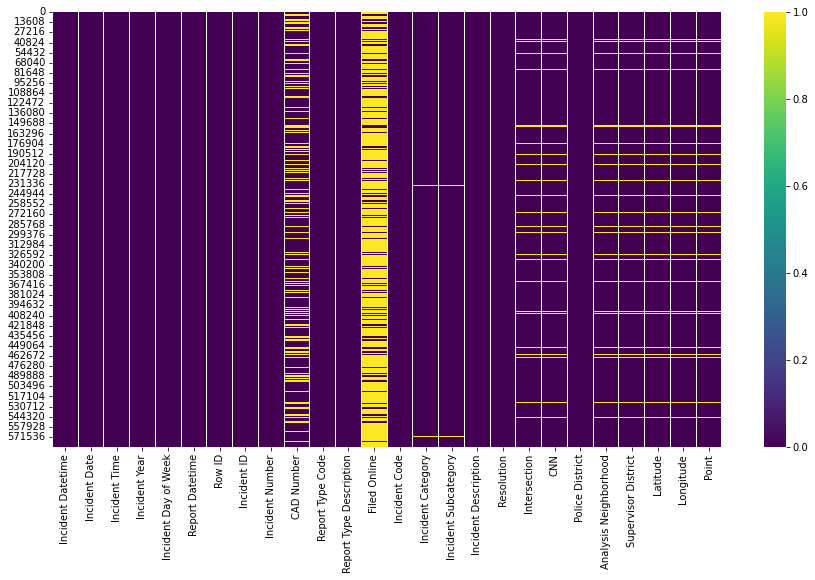

In [17]:
#Finding the Missing Values
sns.heatmap(df.isnull(),cmap = 'viridis')

In [18]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Filed Online,468373,80.044605
CAD Number,129058,22.055918
Analysis Neighborhood,30543,5.219776
Point,30428,5.200123
Longitude,30428,5.200123
Latitude,30428,5.200123
Supervisor District,30428,5.200123
CNN,30428,5.200123
Intersection,30428,5.200123
Incident Category,500,0.085450


In [19]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df.corr()

# print the correlation matrix
corrmat

,Incident Year,Row ID,Incident ID,Incident Number,CAD Number,Incident Code,CNN,Supervisor District,Latitude,Longitude
Incident Year,1.000000,0.965425,0.965425,0.935664,0.563495,-0.024619,-0.006003,0.006209,-0.020119,-0.019864
Row ID,0.965425,1.000000,1.000000,0.918616,0.568031,-0.025892,-0.002790,0.003531,-0.019199,-0.021737
Incident ID,0.965425,1.000000,1.000000,0.918616,0.568031,-0.025894,-0.002790,0.003531,-0.019199,-0.021737
Incident Number,0.935664,0.918616,0.918616,1.000000,0.564442,-0.061986,0.006024,-0.012673,-0.003507,-0.028963
CAD Number,0.563495,0.568031,0.568031,0.564442,1.000000,-0.010667,-0.005599,0.008237,-0.014868,-0.003480
Incident Code,-0.024619,-0.025892,-0.025894,-0.061986,-0.010667,1.000000,-0.032793,0.059376,-0.049021,0.015478
CNN,-0.006003,-0.002790,-0.002790,0.006024,-0.005599,-0.032793,1.000000,-0.412918,0.374118,-0.201558
Supervisor District,0.006209,0.003531,0.003531,-0.012673,0.008237,0.059376,-0.412918,1.000000,-0.764195,0.318425
Latitude,-0.020119,-0.019199,-0.019199,-0.003507,-0.014868,-0.049021,0.374118,-0.764195,1.000000,0.154794
Longitude,-0.019864,-0.021737,-0.021737,-0.028963,-0.003480,0.015478,-0.201558,0.318425,0.154794,1.000000


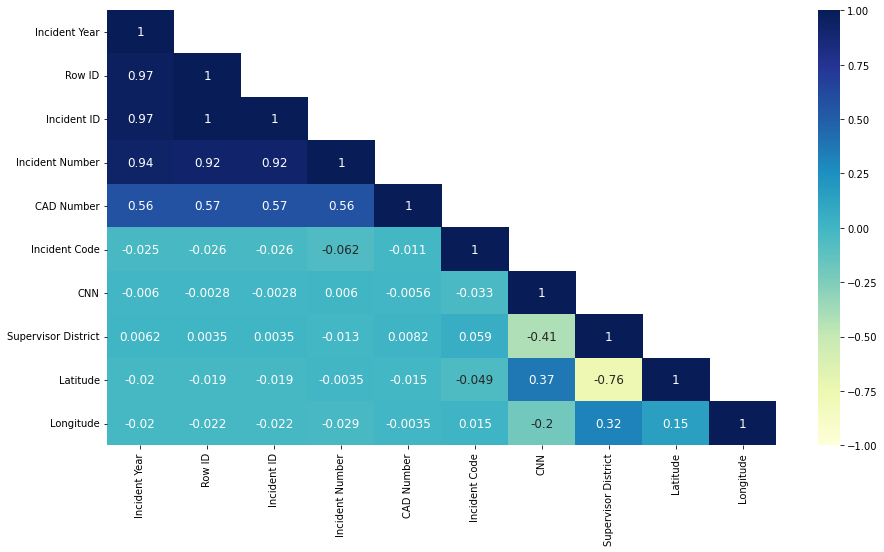

In [20]:
# use 'mask' to plot a lower triangular correlation matrix 
# 'triu_indices_from' returns the indices for the upper-triangle of matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k=1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

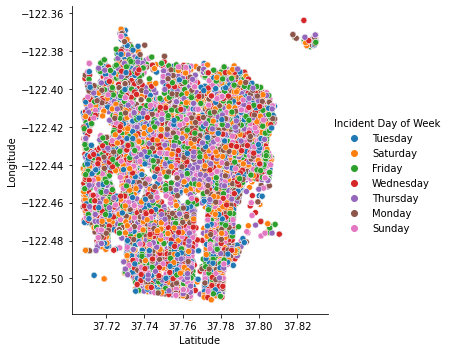

In [22]:
sns.relplot(x='Latitude', y ='Longitude', hue='Incident Day of Week', data=df) 
plt.rcParams['figure.figsize'] = [15,8]

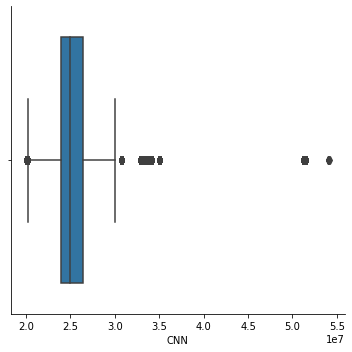

In [23]:
sns.catplot(x='CNN', kind='box', data=df)

In [25]:
df[['Incident Category', 'Incident Day of Week']].value_counts().head(10)

Incident Category    Incident Day of Week
Larceny Theft        Friday                  28020
                     Saturday                26941
                     Wednesday               25082
                     Monday                  24794
                     Sunday                  24590
                     Thursday                24474
                     Tuesday                 23664
Other Miscellaneous  Wednesday                6600
                     Friday                   6147
Malicious Mischief   Friday                   6075
dtype: int64

Text(0.5, 1.0, 'Crime counts')

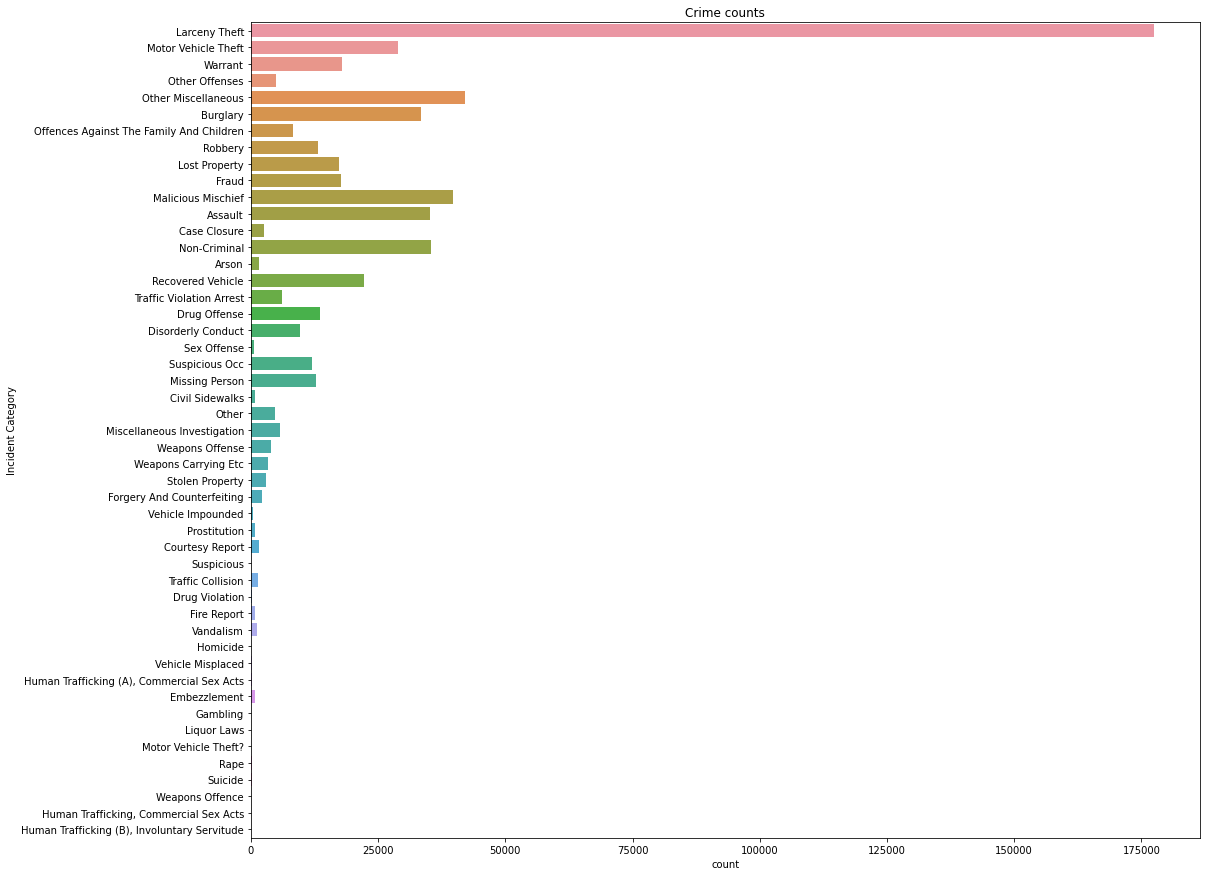

In [27]:
fig, count = plt.subplots(figsize = (17,15))
count = sns.countplot(y = df['Incident Category'])
count.set_title('Crime counts')

In [30]:
category_freqency = pd.DataFrame(df['Incident Category'].value_counts(normalize=True))
category_freqency.reset_index(inplace=True)
category_freqency.rename({'index': 'Incident Category', 'Incident Category': 'Frequency'}, axis='columns', inplace=True)
category_freqency['Cumulative Frequency'] = category_freqency['Frequency'].cumsum()
category_freqency

,Incident Category,Frequency,Cumulative Frequency
0,Larceny Theft,0.303717,0.303717
1,Other Miscellaneous,0.071813,0.375530
2,Malicious Mischief,0.067758,0.443288
3,Non-Criminal,0.060624,0.503912
4,Assault,0.060278,0.564190
5,Burglary,0.057035,0.621225
6,Motor Vehicle Theft,0.049333,0.670558
7,Recovered Vehicle,0.037982,0.708540
8,Warrant,0.030453,0.738993
9,Fraud,0.030296,0.769289


In [33]:
candidate_class = list(category_freqency.loc[category_freqency['Cumulative Frequency'] < 0.8, 'Incident Category'])
candidate_class

['Larceny Theft',
 'Other Miscellaneous',
 'Malicious Mischief',
 'Non-Criminal',
 'Assault',
 'Burglary',
 'Motor Vehicle Theft',
 'Recovered Vehicle',
 'Warrant',
 'Fraud',
 'Lost Property']

In [34]:
reduced_categories = df.loc[df['Incident Category'].isin(candidate_class)]
reduced_categories

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point
0,2019/03/05 09:00:00 PM,2019/03/05,21:00,2019,Tuesday,2019/03/07 12:54:00 PM,77808706372,778087,196048512,NaN,...,"Theft, Other Property, $50-$200",Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,30044000.0,Tenderloin,Tenderloin,6.0,37.779992,-122.413487,POINT (-122.41348740024354 37.77999173926721)
1,2018/12/22 12:00:00 PM,2018/12/22,12:00,2018,Saturday,2018/12/26 02:29:00 PM,75246907023,752469,180971777,183601903.0,...,"Vehicle, Stolen, Motorcycle",Open or Active,LINDEN ST \ BUCHANAN ST,25931000.0,Northern,Hayes Valley,5.0,37.775787,-122.427819,POINT (-122.42781910073226 37.77578657487239)
2,2018/08/24 05:30:00 PM,2018/08/24,17:30,2018,Friday,2018/08/24 07:35:00 PM,70675306243,706753,180639339,182363732.0,...,"Theft, From Locked Vehicle, $200-$950",Open or Active,PERU AVE \ BURROWS ST,21610000.0,Ingleside,Excelsior,9.0,37.723944,-122.422830,POINT (-122.42283006837721 37.72394419349765)
3,2018/10/20 03:10:00 PM,2018/10/20,15:10,2018,Saturday,2018/10/20 03:10:00 PM,72826462071,728264,180624631,182933454.0,...,Probation Search,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,23914000.0,Southern,South of Market,6.0,37.775161,-122.403636,POINT (-122.40363551943442 37.7751608100771)
5,2019/02/12 07:00:00 AM,2019/02/12,07:00,2019,Tuesday,2019/02/12 09:20:00 AM,76962406304,769624,190106328,190430997.0,...,"Theft, From Building, >$950",Open or Active,NEW MONTGOMERY ST \ JESSIE ST,24620000.0,Southern,Financial District/South Beach,6.0,37.787890,-122.401043,POINT (-122.40104304688674 37.787889612676835)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585132,2020/09/12 07:35:00 PM,2020/09/12,19:35,2020,Saturday,2020/09/12 07:35:00 PM,96084327068,960843,200549945,202562568.0,...,False Report of Emergency,Open or Active,BALBOA ST \ 08TH AVE,27278000.0,Richmond,Inner Richmond,1.0,37.777136,-122.466154,POINT (-122.4661536774616 37.77713644788753)
585134,2020/07/16 04:00:00 PM,2020/07/16,16:00,2020,Thursday,2020/07/17 01:26:00 PM,94458906301,944589,200427733,201991610.0,...,"Theft, From Building, <$50",Open or Active,AVENUE D \ 09TH TI ST,34071000.0,Southern,Treasure Island,6.0,37.824119,-122.372658,POINT (-122.372658041869 37.82411913273524)
585136,2020/08/01 05:34:00 PM,2020/08/01,17:34,2020,Saturday,2020/08/01 06:04:00 PM,94911806361,949118,200461010,202142200.0,...,"Theft, Shoplifting, <$50",Open or Active,GEARY BLVD \ 17TH AVE,27500000.0,Richmond,Outer Richmond,1.0,37.780476,-122.476169,POINT (-122.47616919036905 37.780475849410344)
585137,2020/06/01 01:55:00 AM,2020/06/01,01:55,2020,Monday,2020/06/01 01:55:00 AM,93192005061,931920,200330863,201530294.0,...,"Burglary, Warehouse, Forcible Entry",Open or Active,24TH ST \ MINNESOTA ST,23610000.0,Bayview,Potrero Hill,10.0,37.754000,-122.389860,POINT (-122.38985954971992 37.75399971361786)


Text(0.5, 1.0, ' The Most  Occuring Crimes in SF')

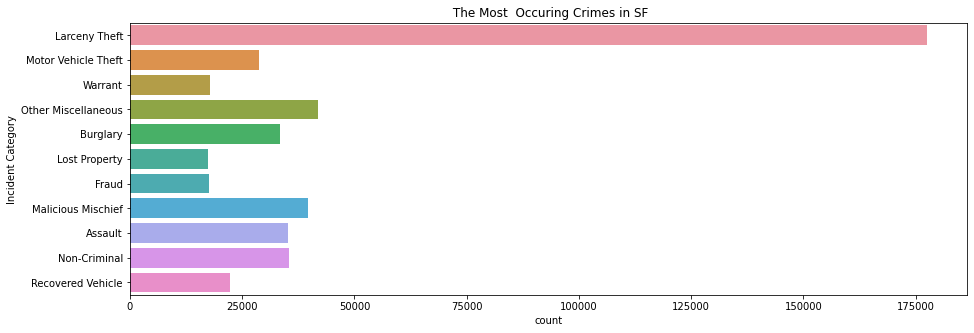

In [35]:
fig, count = plt.subplots(figsize = (15,5))
count = sns.countplot(y = reduced_categories['Incident Category'])
count.set_title(' The Most  Occuring Crimes in SF') 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


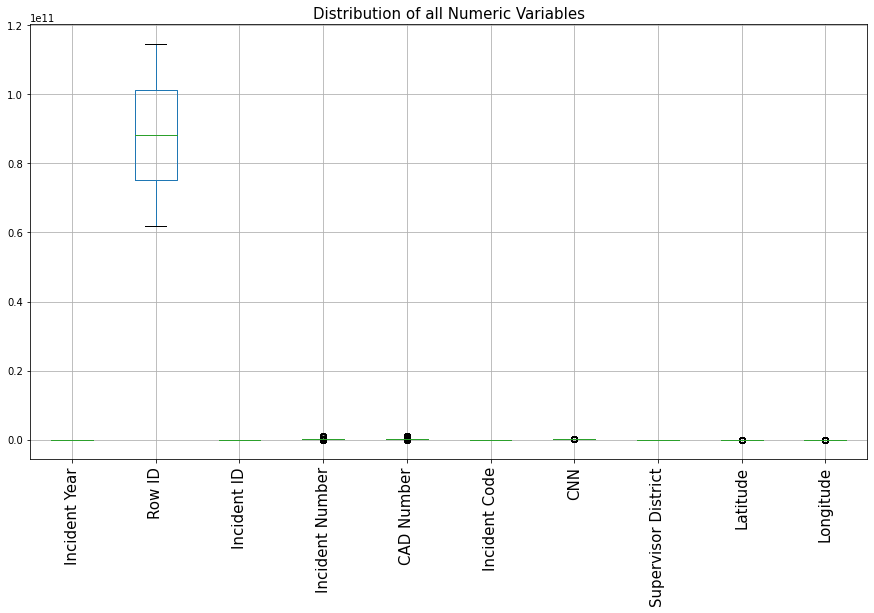

In [36]:
# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


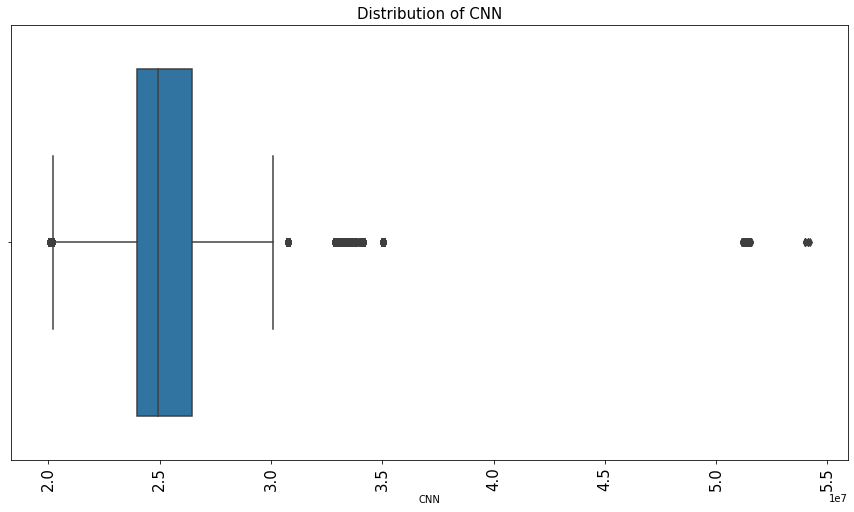

In [37]:
sns.boxplot(df['CNN'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of CNN', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [38]:
df.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'Point'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


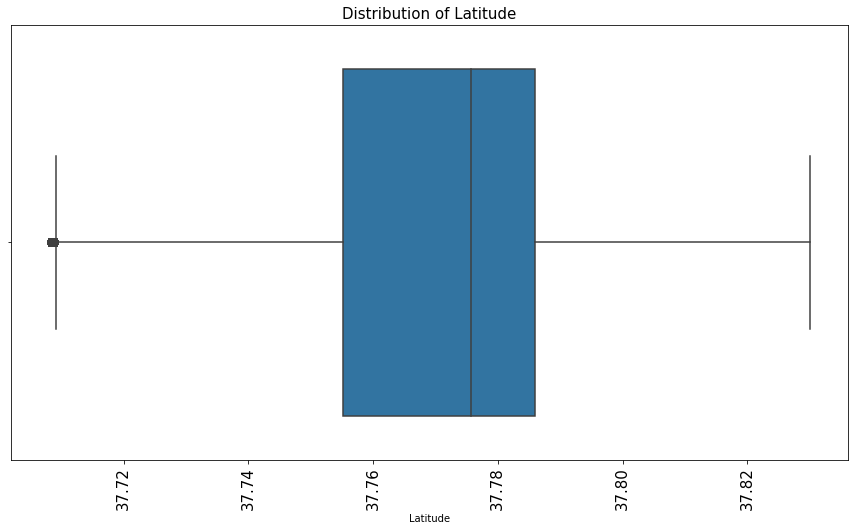

In [39]:
sns.boxplot(df['Latitude'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Latitude', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


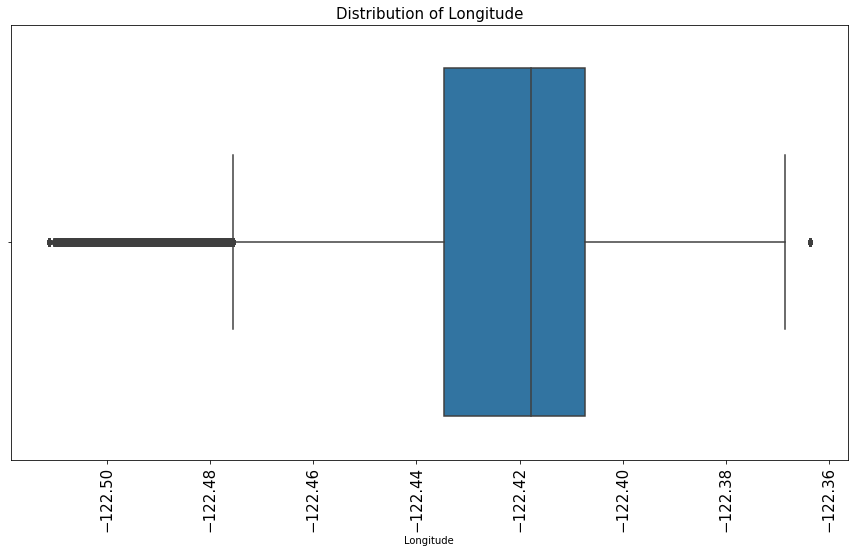

In [40]:
sns.boxplot(df['Longitude'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Longitude', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


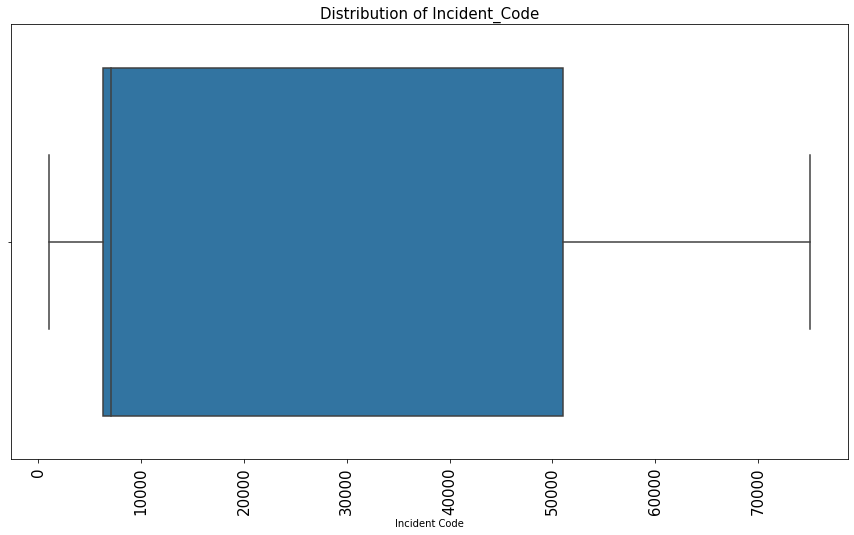

In [42]:
sns.boxplot(df['Incident Code'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Incident_Code', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [43]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Filed Online,468373,80.044605
CAD Number,129058,22.055918
Analysis Neighborhood,30543,5.219776
Point,30428,5.200123
Longitude,30428,5.200123
Latitude,30428,5.200123
Supervisor District,30428,5.200123
CNN,30428,5.200123
Intersection,30428,5.200123
Incident Category,500,0.085450


In [45]:
import pandas as pd

path = "/content/drive/Shareddrives/DATA 245 - ML/cleaned_SF_crime_report.csv"
dfc = pd.read_csv(path)

In [46]:
dfc.head()

,Incident_Date,Incident_Time,Incident_Day_of_Week,Report_Datetime,Row_ID,Incident_ID,Incident_Number,Report_Type_Code,Report_Type_Description,Filed_Online,...,Incident_Category,Incident_Subcategory,Incident_Description,Resolution,CNN,Police_District,Analysis_Neighborhood,Supervisor_District,Latitude,Longitude
0,2019/03/05,21:00,Tuesday,2019/03/07 12:54:00 PM,77808706372,778087,196048512,II,Coplogic Initial,True,...,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,30044000.0,Tenderloin,Tenderloin,6.0,37.779992,-122.413487
1,2018/12/22,12:00,Saturday,2018/12/26 02:29:00 PM,75246907023,752469,180971777,VI,Vehicle Initial,False,...,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Motorcycle",Open or Active,25931000.0,Northern,Hayes Valley,5.0,37.775787,-122.427819
2,2018/08/24,17:30,Friday,2018/08/24 07:35:00 PM,70675306243,706753,180639339,II,Initial,False,...,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, $200-$950",Open or Active,21610000.0,Ingleside,Excelsior,9.0,37.723944,-122.422830
3,2018/10/20,15:10,Saturday,2018/10/20 03:10:00 PM,72826462071,728264,180624631,IS,Initial Supplement,False,...,Warrant,Other,Probation Search,Cite or Arrest Adult,23914000.0,Southern,South of Market,6.0,37.775161,-122.403636
4,2019/06/05,00:36,Wednesday,2019/06/05 12:37:00 AM,80823030140,808230,190403077,II,Initial,False,...,Other Offenses,Other,"Air Gun, Possession",Cite or Arrest Adult,30035000.0,Central,North Beach,3.0,37.802755,-122.413623


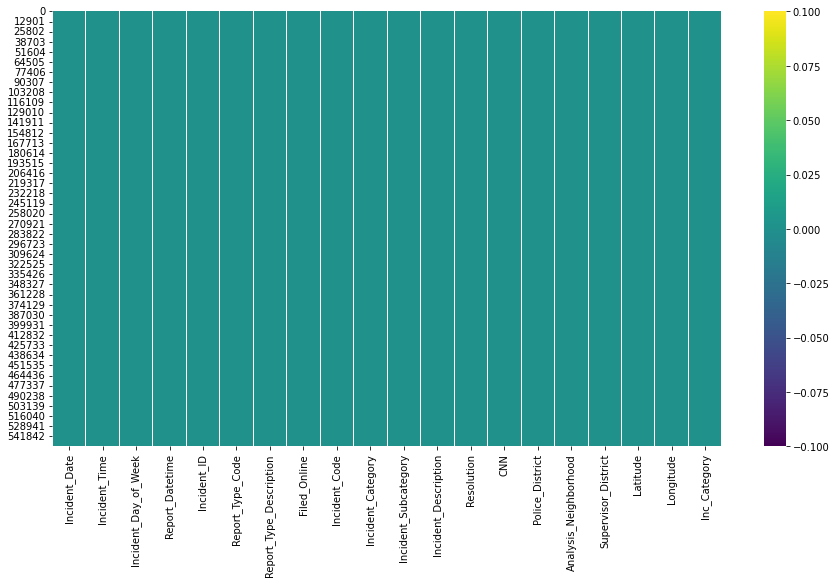

In [64]:
#Finding the Missing Values
sns.heatmap(dfc.isnull(),cmap = 'viridis')

In [47]:
dfc.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,Row_ID,Incident_ID,Incident_Number,Filed_Online,Incident_Code,CNN,Supervisor_District,Latitude,Longitude
Row_ID,1.00,1.00,0.93,-0.03,-0.03,-0.00,0.00,-0.02,-0.02
Incident_ID,1.00,1.00,0.93,-0.03,-0.03,-0.00,0.00,-0.02,-0.02
Incident_Number,0.93,0.93,1.00,0.12,-0.06,0.01,-0.01,-0.00,-0.03
Filed_Online,-0.03,-0.03,0.12,1.00,-0.20,0.06,-0.12,0.11,-0.05
Incident_Code,-0.03,-0.03,-0.06,-0.20,1.00,-0.03,0.06,-0.05,0.02
CNN,-0.00,-0.00,0.01,0.06,-0.03,1.00,-0.41,0.37,-0.20
Supervisor_District,0.00,0.00,-0.01,-0.12,0.06,-0.41,1.00,-0.76,0.32
Latitude,-0.02,-0.02,-0.00,0.11,-0.05,0.37,-0.76,1.00,0.15
Longitude,-0.02,-0.02,-0.03,-0.05,0.02,-0.20,0.32,0.15,1.00


In [51]:
dfc.drop(['Row_ID'], axis =1, inplace=True)
dfc.drop(['Incident_Number'], axis =1, inplace=True)

In [52]:
dfc.dtypes

Incident_Date               object
Incident_Time               object
Incident_Day_of_Week        object
Report_Datetime             object
Incident_ID                  int64
Report_Type_Code            object
Report_Type_Description     object
Filed_Online                  bool
Incident_Code                int64
Incident_Category           object
Incident_Subcategory        object
Incident_Description        object
Resolution                  object
CNN                        float64
Police_District             object
Analysis_Neighborhood       object
Supervisor_District        float64
Latitude                   float64
Longitude                  float64
dtype: object

In [ ]:
dfc[['Incident_Category', 'Incident_Day_of_Week']].value_counts().head(20)

In [ ]:
category_freqency = pd.DataFrame(dfc['Incident_Category'].value_counts(normalize=True))
category_freqency.reset_index(inplace=True)
category_freqency.rename({'index': 'Incident_Category', 'Incident_Category': 'Frequency'}, axis='columns', inplace=True)
category_freqency['Cumulative_Freq'] = category_freqency['Frequency'].cumsum()
category_freqency

In [ ]:
Top_class1 = list(category_freqency.loc[category_freqency['Frequency'] > 0.02, 'Incident_Category'])
Top_class1

In [ ]:
Top_class = list(category_freqency.loc[category_freqency['Cumulative_Freq'] < 0.8, 'Incident_Category'])
Top_class

In [ ]:
reduced_cat = dfc.loc[df['Incident_Category'].isin(Top_class)]
df2=reduced_cat
df2

In [ ]:
fig, count = plt.subplots(figsize = (15,10))
count = sns.countplot(y = reduced_cat['Incident_Category'])
count.set_title('The Most  Common Occuring Crimes in San Francisco')  

In [ ]:
df2['Incident_Category'].value_counts()

In [ ]:
Larceny_Theft = reduced_cat.loc[reduced_cat['Incident_Category'] == 'Larceny Theft']

In [ ]:
Larceny_Theft['Incident_Description'].unique()

In [ ]:
fig, count = plt.subplots(figsize = (25,22))
count = sns.countplot(y = Larceny_Theft['Incident_Description'])
count.set_title('Larceny Theft Descriptions Count')

In [ ]:
Assault= reduced_categories.loc[reduced_cat['Incident_Category'] == 'Assault']

In [ ]:
Assault['Incident_Description'].unique()

In [ ]:
fig, count = plt.subplots(figsize = (25,20))
count = sns.countplot(y = Assault['Incident_Description'])
count.set_title('Different Assualt Descriptions Count')

In [ ]:
Burglary = reduced_cat.loc[reduced_cat['Incident_Category'] == 'Burglary']

In [60]:
# Changing data types to visualize the data
dfc['Incident_Date'] = pd.to_datetime(dfc['Incident_Date'])

dfc['Incident_Day_of_Week'] = dfc['Incident_Date'].dt.dayofweek
#gives only the index(0-monday,6-sunday)

# day of week, report type code, incident category, resolution, intersection, police district, Analysis neighborhood
dfc[['Incident_Day_of_Week', 'Report_Type_Code', 'Incident_Category', 'Resolution',
       'Police_District', 'Analysis_Neighborhood']] = dfc[['Incident_Day_of_Week', 'Report_Type_Code', 'Incident_Category', 'Resolution',
                                                          'Police_District', 'Analysis_Neighborhood']].astype('category')
                                                          
dfc["Report_Type_Code"] = dfc["Report_Type_Code"].astype('category')

dfc["Incident_Category"] = dfc["Incident_Category"].astype('category')
dfc["Incident_Category"] = dfc["Incident_Category"].cat.codes

dfc["Police_District"] = dfc["Police_District"].astype('category')
dfc["Police_District"] = dfc["Police_District"].cat.codes

dfc["Analysis_Neighborhood"] = dfc["Analysis_Neighborhood"].astype('category')
dfc["Analysis_Neighborhood"] = dfc["Analysis_Neighborhood"].cat.codes

In [61]:
dfc.dtypes

Incident_Date              datetime64[ns]
Incident_Time                      object
Incident_Day_of_Week             category
Report_Datetime                    object
Incident_ID                         int64
Report_Type_Code                 category
Report_Type_Description            object
Filed_Online                         bool
Incident_Code                       int64
Incident_Category                    int8
Incident_Subcategory               object
Incident_Description               object
Resolution                       category
CNN                               float64
Police_District                      int8
Analysis_Neighborhood                int8
Supervisor_District               float64
Latitude                          float64
Longitude                         float64
Inc_Category                     category
dtype: object

In [62]:
dfc.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Incident_ID,Filed_Online,Incident_Code,Incident_Category,CNN,Police_District,Analysis_Neighborhood,Supervisor_District,Latitude,Longitude
Incident_ID,1.00,-0.03,-0.03,-0.02,-0.00,-0.01,-0.01,0.00,-0.02,-0.02
Filed_Online,-0.03,1.00,-0.20,-0.10,0.06,-0.03,-0.02,-0.12,0.11,-0.05
Incident_Code,-0.03,-0.20,1.00,0.44,-0.03,0.05,0.03,0.06,-0.05,0.02
Incident_Category,-0.02,-0.10,0.44,1.00,-0.03,-0.01,0.00,0.06,-0.05,0.03
CNN,-0.00,0.06,-0.03,-0.03,1.00,0.24,0.07,-0.41,0.37,-0.20
Police_District,-0.01,-0.03,0.05,-0.01,0.24,1.00,0.42,-0.20,0.14,-0.35
Analysis_Neighborhood,-0.01,-0.02,0.03,0.00,0.07,0.42,1.00,-0.17,0.18,-0.18
Supervisor_District,0.00,-0.12,0.06,0.06,-0.41,-0.20,-0.17,1.00,-0.76,0.32
Latitude,-0.02,0.11,-0.05,-0.05,0.37,0.14,0.18,-0.76,1.00,0.15
Longitude,-0.02,-0.05,0.02,0.03,-0.20,-0.35,-0.18,0.32,0.15,1.00


In [53]:
pip install pywedge

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [63]:
import pywedge as pw

x = pw.Pywedge_Charts(dfc, c = None, y = 'Police_District')
charts = x.make_charts()

/usr/local/lib/python3.7/dist-packages/pywedge/pywedge.py:27: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



HTML(value='<h2>Pywedge Make_Charts </h2>')